In [1]:
# This file takes the Captured dataset accuired from 'capture_data.py' 
#does simple preprocessing and trains 3 models along with their evaluation


#importing 
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


data = pd.read_csv('gesture_data_preproc.csv')

# Clean the data
data = data.dropna()
X = data.drop('label', axis=1)
y = data['label']
X = X.astype(float)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate and plot metrics
def evaluate_and_report(clf, X_test, y_test, clf_name):
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"{clf_name} Accuracy: {accuracy}")
    print(f"{clf_name} Precision: {precision}")
    print(f"{clf_name} Recall: {recall}")
    print(f"{clf_name} F1 Score: {f1}")

     # Classification Report
    report = classification_report(y_test, y_pred, target_names= y.unique(), output_dict=True)
    print(f"\n{clf_name} Classification Report:\n{report}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=y.unique())
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{clf_name} Confusion Matrix')
    plt.show()

    # Plot accuracy, precision, recall, and f1 score
    metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
    plt.figure(figsize=(10, 5))
    plt.bar(metrics.keys(), metrics.values())
    plt.title(f'{clf_name} Metrics')
    plt.show()


# Training an SVM, RF and a MLP models 

# Train an SVM classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Train a Random Forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Train a Neural Network classifier
mlp_clf = MLPClassifier(max_iter=500)
mlp_clf.fit(X_train, y_train)
mlp_pred = mlp_clf.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, mlp_pred))





SVM Accuracy: 0.9322033898305084
Random Forest Accuracy: 0.9322033898305084
Neural Network Accuracy: 0.9491525423728814


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM Accuracy: 0.9322033898305084
SVM Precision: 0.9351296129284533
SVM Recall: 0.9322033898305084
SVM F1 Score: 0.9300093231085967

SVM Classification Report:
{'thumbs_up': {'precision': 0.9583333333333334, 'recall': 0.92, 'f1-score': 0.9387755102040817, 'support': 25.0}, 'heart': {'precision': 0.9230769230769231, 'recall': 0.7058823529411765, 'f1-score': 0.8, 'support': 17.0}, 'open_palm': {'precision': 0.8947368421052632, 'recall': 1.0, 'f1-score': 0.9444444444444444, 'support': 17.0}, 'perfect': {'precision': 1.0, 'recall': 0.9473684210526315, 'f1-score': 0.972972972972973, 'support': 19.0}, 'point_up': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5.0}, 'point_down': {'precision': 0.9444444444444444, 'recall': 1.0, 'f1-score': 0.9714285714285714, 'support': 17.0}, 'fist': {'precision': 0.8571428571428571, 'recall': 1.0, 'f1-score': 0.9230769230769231, 'support': 18.0}, 'accuracy': 0.9322033898305084, 'macro avg': {'precision': 0.9396763428718315, 'recall': 0.9390358

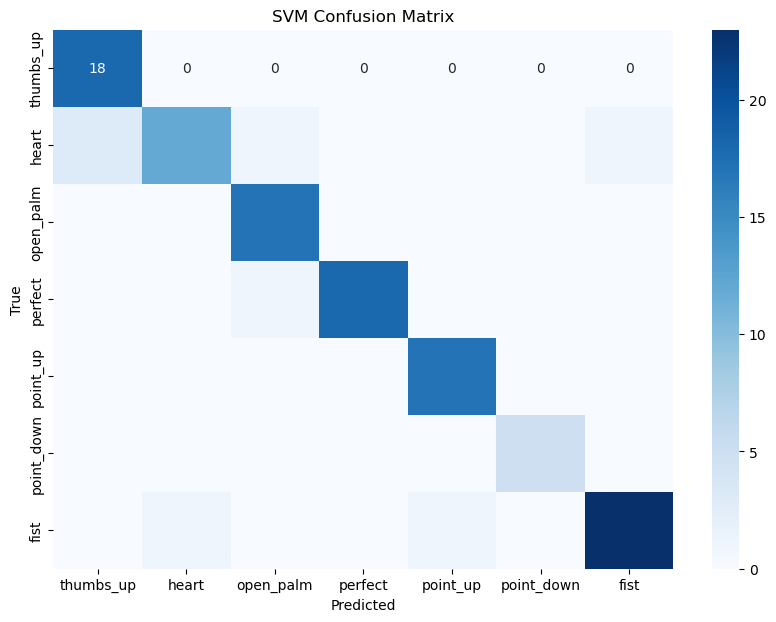

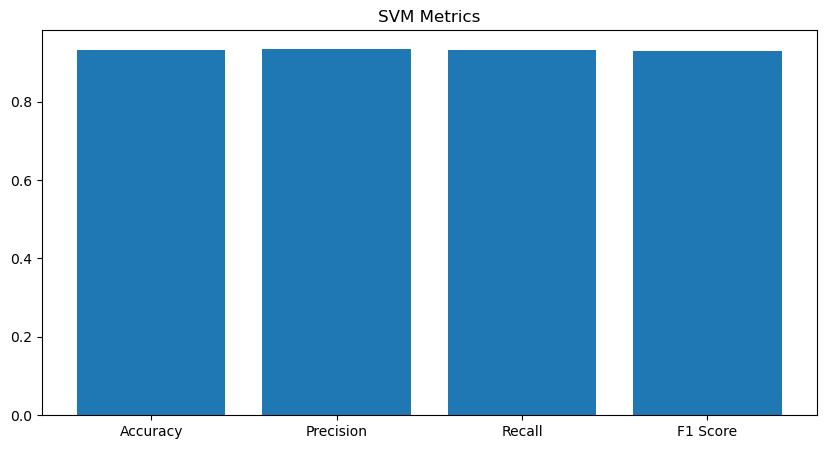

In [2]:
evaluate_and_report(svm_clf, X_test, y_test, "SVM")

Random Forest Accuracy: 0.9322033898305084
Random Forest Precision: 0.9353800624987065
Random Forest Recall: 0.9322033898305084
Random Forest F1 Score: 0.9305989410105631

Random Forest Classification Report:
{'thumbs_up': {'precision': 1.0, 'recall': 0.96, 'f1-score': 0.9795918367346939, 'support': 25.0}, 'heart': {'precision': 0.9230769230769231, 'recall': 0.7058823529411765, 'f1-score': 0.8, 'support': 17.0}, 'open_palm': {'precision': 0.9444444444444444, 'recall': 1.0, 'f1-score': 0.9714285714285714, 'support': 17.0}, 'perfect': {'precision': 0.9473684210526315, 'recall': 0.9473684210526315, 'f1-score': 0.9473684210526315, 'support': 19.0}, 'point_up': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5.0}, 'point_down': {'precision': 0.9444444444444444, 'recall': 1.0, 'f1-score': 0.9714285714285714, 'support': 17.0}, 'fist': {'precision': 0.8095238095238095, 'recall': 0.9444444444444444, 'f1-score': 0.8717948717948718, 'support': 18.0}, 'accuracy': 0.9322033898305084, 

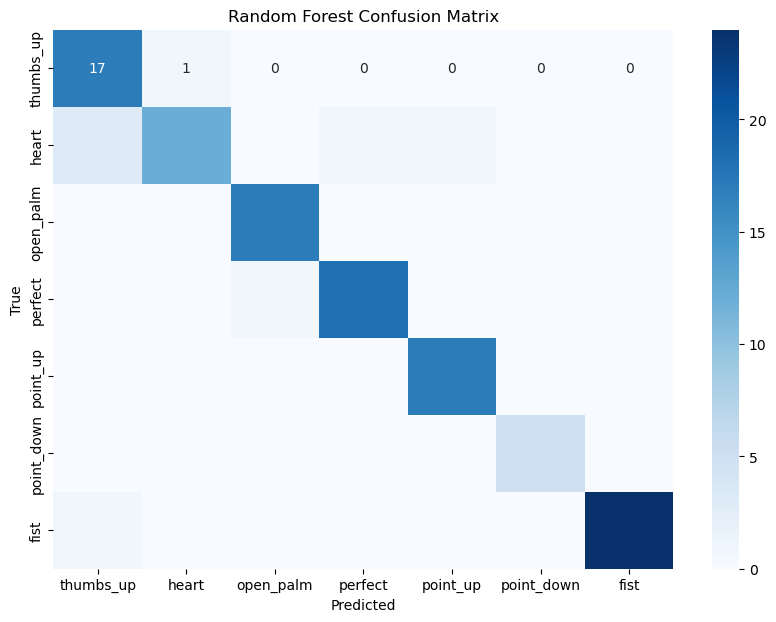

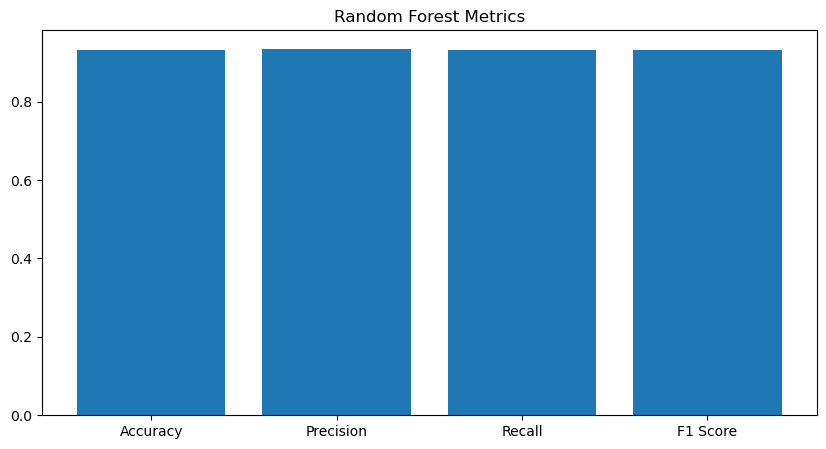

In [3]:
evaluate_and_report(rf_clf, X_test, y_test, "Random Forest")

Neural Network Accuracy: 0.9491525423728814
Neural Network Precision: 0.9537261232176487
Neural Network Recall: 0.9491525423728814
Neural Network F1 Score: 0.9479981005404734

Neural Network Classification Report:
{'thumbs_up': {'precision': 0.96, 'recall': 0.96, 'f1-score': 0.96, 'support': 25.0}, 'heart': {'precision': 1.0, 'recall': 0.7647058823529411, 'f1-score': 0.8666666666666667, 'support': 17.0}, 'open_palm': {'precision': 0.9444444444444444, 'recall': 1.0, 'f1-score': 0.9714285714285714, 'support': 17.0}, 'perfect': {'precision': 1.0, 'recall': 0.9473684210526315, 'f1-score': 0.972972972972973, 'support': 19.0}, 'point_up': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5.0}, 'point_down': {'precision': 0.9444444444444444, 'recall': 1.0, 'f1-score': 0.9714285714285714, 'support': 17.0}, 'fist': {'precision': 0.8571428571428571, 'recall': 1.0, 'f1-score': 0.9230769230769231, 'support': 18.0}, 'accuracy': 0.9491525423728814, 'macro avg': {'precision': 0.9580045351

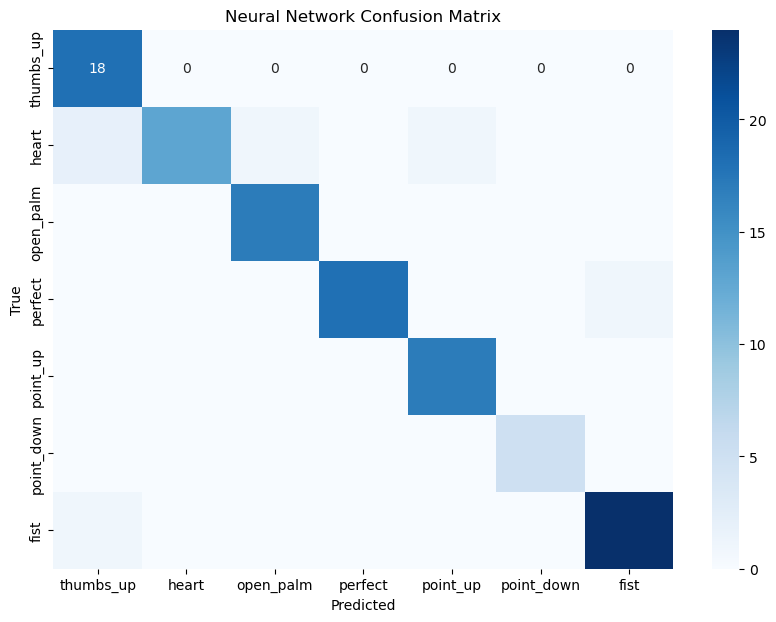

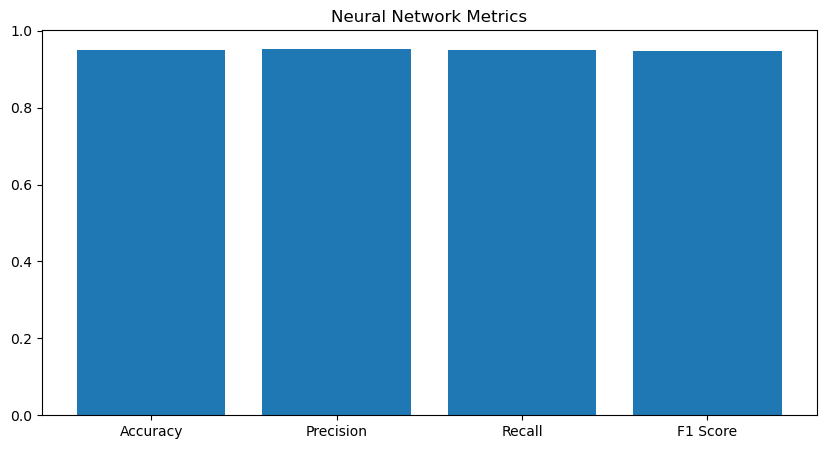

In [4]:
evaluate_and_report(mlp_clf, X_test, y_test, "Neural Network")

In [5]:
# Save the classifiers
joblib.dump(svm_clf, 'svm_gesture_classifier.pkl')
joblib.dump(rf_clf, 'rf_gesture_classifier.pkl')
joblib.dump(mlp_clf, 'mlp_gesture_classifier.pkl')

['mlp_gesture_classifier.pkl']